In [244]:
# -*- coding: utf-8 -*-
"""
Generate missing completely at random (MCAR)
@author: Kevin S. Xu
"""
import numpy as np
def generate_mcar_data(data, missing_rate, missing_value=np.nan,
random_state=1):
    # Generate uniform random numbers and choose entries smaller than
    # missing_rate to be missing using a mask
    rng = np.random.default_rng(random_state)
    random_missing = rng.random((data.shape[0], data.shape[1] - 1))
    mask = np.where(random_missing < missing_rate, 1, 0)
    mask_with_label = np.hstack((mask, np.zeros((data.shape[0], 1))))
    data_missing = data.copy()
    data_missing[mask_with_label == 1] = missing_value
    return data_missing


In [245]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

data = pd.read_csv("/Users/efang/Desktop/coding/Intro-to-ML/CSDS340/data/pima-indians-diabetes.csv", header=None)

def test(message, X_train, y_train, X_test, y_test):
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
    clf_tree.fit(X_train, y_train)
    accuracy = clf_tree.score(X_test, y_test)
    print(message, accuracy)


In [246]:
X_full = data.iloc[:, :-1]
y = data.iloc[:, -1]

X = generate_mcar_data(X_full, .2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

print(X)

        0      1     2     3      4     5      6   7
0     6.0  148.0   NaN  35.0    0.0  33.6  0.627  50
1     1.0   85.0   NaN  29.0    0.0  26.6  0.351  31
2     8.0  183.0   NaN   0.0    0.0  23.3  0.672  32
3     1.0   89.0  66.0  23.0   94.0  28.1  0.167  21
4     NaN  137.0  40.0   NaN  168.0  43.1  2.288  33
..    ...    ...   ...   ...    ...   ...    ...  ..
763  10.0  101.0  76.0  48.0  180.0  32.9  0.171  63
764   NaN  122.0  70.0  27.0    0.0  36.8  0.340  27
765   5.0  121.0  72.0   NaN    NaN   NaN  0.245  30
766   1.0  126.0  60.0   0.0    0.0  30.1  0.349  47
767   1.0   93.0  70.0  31.0    0.0  30.4  0.315  23

[768 rows x 8 columns]


In [257]:
from sklearn.impute import KNNImputer
X_full = data.iloc[:, :-1]
y = data.iloc[:, -1]

X = generate_mcar_data(X_full, .2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

imputer = KNNImputer(n_neighbors = 7, weights = "uniform")
imputer.fit(X_train)
X_train = imputer.transform(X_train)

clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)
clf_tree.fit(X_train, y_train)
print("KNNImputation:", clf_tree.score(imputer.transform(X_test), y_test))


KNNImputation: 0.7395833333333334


In [269]:
from sklearn.impute import SimpleImputer
X_full = data.iloc[:, :-1]
y = data.iloc[:, -1]

X = generate_mcar_data(X_full, .2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

imputer = SimpleImputer(strategy="mean")
imputer.fit(X_train)
X_train = imputer.transform(X_train)

clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)
clf_tree.fit(X_train, y_train)
print("SimpleImputation:", clf_tree.score(imputer.transform(X_test), y_test))


SimpleImputation: 0.7291666666666666


In [249]:
from sklearn.impute import IterativeImputer
X_full = data.iloc[:, :-1]
y = data.iloc[:, -1]

X = generate_mcar_data(X_full, .2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

imputer = IterativeImputer(max_iter=6, n_nearest_features=3, random_state=1)
imputer.fit(X_train)
X_train = imputer.transform(X_train)

clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)
clf_tree.fit(X_train, y_train)
print("Iterative Imputation:", clf_tree.score(imputer.transform(X_test), y_test))


Iterative Imputation: 0.75


/Users/efang/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [250]:
# No imputation
X_full = data.iloc[:, :-1]
y = data.iloc[:, -1]

X = generate_mcar_data(X_full, .2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
clf_tree.fit(X_train, y_train)
print("No imputation:", clf_tree.score(X_test, y_test))


No imputation: 0.71875


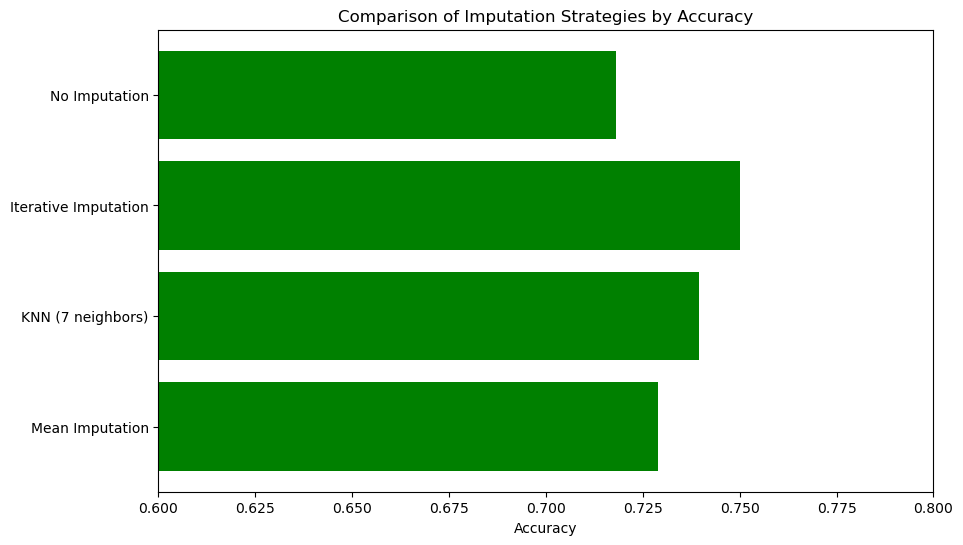

In [274]:
import matplotlib.pyplot as plt


mean_accuracy = 0.729
knn_accuracy = 0.7395
iterative_accuracy = 0.75
no_imputation_accuracy = 0.718 


labels = ['Mean Imputation', 'KNN (7 neighbors)', 'Iterative Imputation', 'No Imputation']

accuracies = [mean_accuracy] + [knn_accuracy] + [iterative_accuracy, no_imputation_accuracy]

plt.figure(figsize=(10, 6))
plt.barh(labels, accuracies, color='green')
plt.xlabel('Accuracy')
plt.title('Comparison of Imputation Strategies by Accuracy')
plt.xlim([0.6, 0.8])  
plt.show()
